# [Project]  기계 시설물 센서 데이터 기반 고장 예지 프로젝트

---

## 프로젝트 목적
  - 도시철도 역사 3개소 용량(kW)별 12종 전동기 41대의 센서데이터를 활용하여 고장의 주요 유형을 예측합니다.
  - 파이선 머신러닝 라이브러리인 scikit-learn (SKLearn) 을 활용하여 센서의 수집 신호를 학습하여 고장의 유형 (베어링 불량. 회전체 불평형, 축정렬 불량, 벨트 느슨함)을 예측하는 모델을 개발합니다. 
  

---

## lab2의 목표
- 이번 lab에서는 앞서 생성한 hdf5를 로딩하고, SVM algorithm을 적용하여 성능을 평개해 보고 예측을 수행해 보겠습니다.

- SVM의 성능을 개선하는 몇가지 방법을 실습해 봅니다.
- Decision Tree, Random Forest에 대해서도 실습해 봅니다.

---

## 1. 머신러닝 모델 학습 및 평가

## 1.1 학습 데이터 분류하기

- 프로젝트에 필요한 라이브러리를 미리 import 하겠습니다.

In [1]:
import matplotlib.pyplot as plt
from itertools import cycle

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm

np.random.seed(0)

- lab1 에서 생성한 dataset.h5를 pandas dataframe으로 읽어 보도록 하겠습니다.
- Xs는 예측에 입력으로 사용할 데이터 이며, Ys는 레이블입니다.

In [2]:
Xs = pd.read_hdf('./dataset.h5', 'Xs')
Ys = pd.read_hdf('./dataset.h5', 'Ys')
print(Xs, Ys)

       R_AbsMax   S_AbsMax   T_AbsMax  R_AbsMean  S_AbsMean  T_AbsMean  \
0      3.523438   3.203125   4.204102   2.123972   1.904358   2.313897   
1      4.684570   4.964844   4.924805   2.581198   2.669424   2.562180   
2      4.764648   5.325195   4.964844   2.787059   3.010797   2.761754   
3      4.829712   5.069946   4.994873   2.682742   2.741545   2.638449   
4     81.649658  81.629639  81.629639  54.699525  54.174483  54.228436   
...         ...        ...        ...        ...        ...        ...   
2329   4.674561   4.994873   4.754639   2.658974   2.775588   2.589056   
2330   5.044922   5.165039   4.964844   2.594071   2.685360   2.562720   
2331   3.483398   3.203125   4.244141   2.092722   1.873928   2.290134   
2332  79.922974  79.592651  80.243286  47.443321  46.707518  46.859366   
2333   4.469360   4.829712   4.429321   2.673493   2.785202   2.553396   

           R_P2P       S_P2P       T_P2P      R_RMS  ...        R_2x  \
0       7.046875    6.326172    7.92773

- Machine Learning을 학습할 데이터는 Traning Set, Validation set, Test set 으로 나눠야 합니다.

- Traning Set은 모델의 파라메터를 학습하기 위해서 사용합니다.

- Validation Set 과 Test Set 은 학습한 모델을 평가하기 위해서 사용합니다.

- Validation Set 은 모델을 반복적으로 학습하는 과정에서 지속적으로 사용하면서 학습한 모델의 상태를 모니터링하기 위해서 사용하며 Test Set 은 학습이 완료된 시점에서 모델의 최종 성능을 판별하기 위한 목적으로 사용합니다.

- Traning set과 Test Set은 모델의 학습과 성능평가를 위해서 필수적으로 나누어야 합니다.

- 이번 Lab에서는 Validation Set은 사용하지 않습니다.


- 전체 데이터 셋을 Training Set 과 Test Set으로  각각 80%, 20%의 비율로 나눕니다.

In [3]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_tr, X_te, Y_tr, Y_te = train_test_split(Xs.values, Ys.values, test_size=test_size, random_state=seed)
print(X_tr.shape, Y_tr.shape, X_te.shape, Y_te.shape)

(1867, 46) (1867, 1) (467, 46) (467, 1)


---

## 1.2 Support Vector Machine (SVM)

- Scikit-learn 라이브러리는 데이터분석 및 기계학습을 쉽게 할 수 있도록 도와주는 라이브러리 입니다.

- Sckkit-learn의 ML 알고리즘은 사용할  algorithm과 그에 필요한 파라메터를 정의하는 모델 생성 단계, fit함수를 이용한 학습단계로 구성되며, 학습된 모델의 성능을 확인할 수 있는 다양한 함수를 제공합니다.


- SVM은 Margin을 최대화하는 Decisoion Boundary(결정경계)를 찾는 지도학습 (Supervised Learning) 알고리즘 입니다.
- Margin은 결정경계에서 가장 가까운 각 class의 data point의 거리로 입니다.


- 먼저 SVM 모델을 학습하고 성능을 평가하겠습니다.
- SVM은 One-vs-One Multi-class Classification을 사용하겠습니다.

In [4]:
# 모델 생성
clf = svm.SVC(decision_function_shape='ovo', random_state=seed)

#모델 학습
clf.fit(X_tr, Y_tr.ravel())

#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {clf.score(X_tr, Y_tr)}')
print(f'Accuracy of svm.SVC classifier on test set: {clf.score(X_te, Y_te)}')

Accuracy of svm.SVC classifier on training set: 0.5420460632029994
Accuracy of svm.SVC classifier on test set: 0.5246252676659529


- SVM의 테스트셋 평가 결과가 0.5정도로 낮은 편입니다. 
- 정답 레이블의 분포 비율이 매우 다르기 때문에 정확도만으로 판단하기는 어렵습니다.


- predict 함수는 학습된 모델을 이용하여 예측을 수행하는 함수 입니다.


-  classificatuion report는 predict 함수를 통해서 예측한 class와 정답 label을 가지고 class별로 성능이 어떤지 확인할 수 있습니다.
- Confusion Matrix를 이용하여 어떤 class를 어떻게 예측하였는지 구체적으로 확인할 수 있습니다.

In [5]:
# 학습된 모델을 가지고 예측을 수행합니다.
y_pred = clf.predict(X_te)

#예측한 결과와 정답 label을 이용하여 classification report와 confusion matrix를 출력해 봅니다.
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63       212
           2       0.54      0.38      0.44        69
           4       0.97      0.42      0.58        72

   micro avg       0.52      0.69      0.60       353
   macro avg       0.67      0.56      0.55       353
weighted avg       0.60      0.69      0.58       353

confusion matrix:
 [[189   0  22   0   1]
 [ 42   0   0   0   0]
 [ 43   0  26   0   0]
 [ 72   0   0   0   0]
 [ 42   0   0   0  30]]


- Confusion matrix는 정답 라벨을 y축으로 하고, 예측한 class 를 x 축으로 하여 예측한 값과 실제 값을 비교한 표입니다.
- 세 번째 row인 (43, 0, 26, 0, 0)의 의미는 실제 라벨이 2인 (0부터 시작합니다)인 클래스를 0으로 43개를 예측하였고, 3으로 26개를 예측하였다는 의미 입니다.
- Confusion matrix를 보면 class 1 과 3을 잘 예측하지 못한 결과를 확인 할 수 있습니다.
- 또한, 대부분의 class를 0으로 예측하는 것을 알 수 있습니다.


- 정상(0)인 샘플이 많은 unbalanced Dataset에서는 class weight를 사용하면 효과가 있을 수 있습니다.
- class_weight='balanced'로 하여 학습을 하고 결과를 검토해 봅시다.

In [6]:
# 모델 생성
clf = svm.SVC(decision_function_shape='ovo', class_weight='balanced', random_state=seed)

#모델 학습
clf.fit(X_tr, Y_tr.ravel())

#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {clf.score(X_tr, Y_tr)}')
print(f'Accuracy of svm.SVC classifier on test set: {clf.score(X_te, Y_te)}')
# 학습된 모델을 가지고 예측을 수행합니다.
y_pred = clf.predict(X_te)

#예측한 결과와 정답 label을 이용하여 classification report와 confusion matrix를 출력해 봅니다.
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

Accuracy of svm.SVC classifier on training set: 0.3797536154258168
Accuracy of svm.SVC classifier on test set: 0.37044967880085655
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       212
           1       0.18      1.00      0.30        42
           2       0.46      0.38      0.42        69
           3       0.52      1.00      0.68        72
           4       0.97      0.42      0.58        72

    accuracy                           0.37       467
   macro avg       0.63      0.56      0.40       467
weighted avg       0.77      0.37      0.30       467

confusion matrix:
 [[  3 153  30  25   1]
 [  0  42   0   0   0]
 [  0  43  26   0   0]
 [  0   0   0  72   0]
 [  0   0   0  42  30]]


- Accuracy가 54%에서 38% 정도로 떨어 졌지만 Confusion matrix를 보면 label이 0이 아닌 class를 더 잘 맞추는 것을 확인 할 수 있습니다.

- 정상(0)이 96%이고, 4가지 형태의 불량이 각각 1%인 데이터 셋이 있다면 무조건 0으로 예측하는 모델은 96%의 accuracy를 보입니다.

- 무조건 정상으로만 예측하는 모델과 50%의 확률로 4가지 형태의 불량을 예측하는 모델이 있다면, 후자의 모델이 더 유용한 모델인 것은 직관적으로 당연할 것입니다.

- Accuracy가 모델의 성능을 평가하는 대표적인 지표이지만, class의 분포가 일정하지 않은 데이터 셋의 경우에는 그렇지 않을 경우도 있습니다.


---

## 1.3 데이터 정규화를 위한 전처리 파이프라인

- 데이터에서 어떤 feature는 0에서 1까지의 값을 가지는데, 다른 feature는 100에서 1,000까지의 값을 가진다면, 100~1,000까지의 값을 가지는 feature가 특정 알고리즘에서는 더 큰 영향을 미치는 경우가 있습니다.

- 따라서 데이터를 정규화(Normalization) 혹은 표준화(Standardization)를 수행하여 모든 Feature의 scale을 동일하게 맞추어 줄 필요가 있습니다.


- 전처리 알고리즘을 Sklearn에서는 파이프라인으로 추가할 수 있습니다.

- StandardScalar는 데이터에서 평균과 표준편차를 계산하여, 모든 feature의 평균이 0, 분산이 1이 되도록 합니다.

In [7]:
# 전처리 파이프라인 추가
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC(decision_function_shape='ovo', class_weight='balanced', random_state=seed))])
pipe.fit(X_tr, Y_tr.ravel())

#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {pipe.score(X_tr, Y_tr)}')
print(f'Accuracy of svm.SVC classifier on test set: {pipe.score(X_te, Y_te)}')

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

Accuracy of svm.SVC classifier on training set: 0.7937868237814676
Accuracy of svm.SVC classifier on test set: 0.8308351177730193
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       212
           1       0.18      1.00      0.30        42
           2       0.46      0.38      0.42        69
           3       0.52      1.00      0.68        72
           4       0.97      0.42      0.58        72

    accuracy                           0.37       467
   macro avg       0.63      0.56      0.40       467
weighted avg       0.77      0.37      0.30       467

confusion matrix:
 [[  3 153  30  25   1]
 [  0  42   0   0   0]
 [  0  43  26   0   0]
 [  0   0   0  72   0]
 [  0   0   0  42  30]]


- 전처리 파이프라인을 추가하니 test set 에서 성능이 0.38 에서 0.83 으로 향상되었습니다.
- 이는 overfitting이 되지 않고, 모델이 잘 일반화(generalization) 되었다는 증거입니다.


- sklearn의 svm에는 다양한 model parameter가 있으며 이를 변경하여 성능이 어떻게 변하는지 확인해 봅시다.
---

## 1.4 LinearSVC

- Sklearn에는 LibLinear와 LibSVM 두 가지의 SVM 구현체가 있습니다.
- 우리는 앞서서 LibSVM을 사용한 SVC를 가지고 테스트를 해 보았으며, LibLinear 구현체를 사용한 SVM 모델을 사용해 보겠습니다.
- SVC 와 LinearSVC의 가장 큰 차이는 모델을 최적화 하는데 사용하는 Loss function에 있습니다.


- LibLinear 구현체를 사용한, LinearSVC를 이용하여 학습을 해보겠습니다.

In [8]:
# LinearSVC 모델 
clf = svm.LinearSVC(max_iter=1000, class_weight='balanced', random_state=seed)
clf.fit(X_tr, Y_tr.ravel())
print('Accuracy of svm.LinearSVC() classifier on training set: {:.2f}'
     .format(clf.score(X_tr, Y_tr)))
print('Accuracy of svm.LinearSVC() classifier on test set: {:.2f}'
     .format(clf.score(X_te, Y_te)))

#모델의 성능을 confusion matrix로 확인
y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

Accuracy of svm.LinearSVC() classifier on training set: 0.79
Accuracy of svm.LinearSVC() classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       212
           1       0.91      0.95      0.93        42
           2       0.51      0.99      0.67        69
           3       0.85      0.99      0.91        72
           4       0.93      0.60      0.73        72

    accuracy                           0.81       467
   macro avg       0.84      0.85      0.82       467
weighted avg       0.88      0.81      0.82       467

confusion matrix:
 [[157   4  35  13   3]
 [  1  40   1   0   0]
 [  1   0  68   0   0]
 [  1   0   0  71   0]
 [  0   0  29   0  43]]


/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


- training 과 test set의 accuracy가 꽤 높게 나왔으나 model이 converge하지 않는다는 warning이 발생하고 있습니다.
- 이는 data normalizaion이 되지 않아서 발생할 가능성이 있습니다.


- 앞에서 배운 전처리 알고리즘을 LinearSVC와 파이프라인으로 구성하면 어떻게 되는지 확인해 봅시다.

In [9]:
# LinearSVC에 전처리 파이프라인 추가
pipe = Pipeline([('scaler', StandardScaler()), ('LinearSVC', svm.LinearSVC(max_iter=10000, class_weight='balanced', random_state=seed))])
model = pipe.fit(X_tr, Y_tr.ravel())

#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {model.score(X_tr, Y_tr)}')
print(f'Accuracy of svm.SVC classifier on test set: {model.score(X_te, Y_te)}')

y_pred = model.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

Accuracy of svm.SVC classifier on training set: 0.839850026780932
Accuracy of svm.SVC classifier on test set: 0.8736616702355461
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       212
           1       0.71      1.00      0.83        42
           2       0.86      0.88      0.87        69
           3       0.83      1.00      0.91        72
           4       0.89      1.00      0.94        72

    accuracy                           0.87       467
   macro avg       0.85      0.93      0.88       467
weighted avg       0.89      0.87      0.87       467

confusion matrix:
 [[161  17  10  15   9]
 [  0  42   0   0   0]
 [  8   0  61   0   0]
 [  0   0   0  72   0]
 [  0   0   0   0  72]]


- Confusion Matrix를 보면 0으로 잘 못 예측을 하는 경우가 있지만, 다른 class로는 예측하지 않는 어느정도 쓸만한 모델이 만들어 졌습니다.

---

## 1.5 model bagging

- bagging이란 입력 데이터를 모델 수 만큼 나눈 뒤, 각각 학습하는 방법입니다.
- 모델이 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행합니다. (소프트보팅)
- 해당 메소드가 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됩니다. (하드보팅)

In [10]:
# model bagging
from sklearn.ensemble import BaggingClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('LinearSVC', svm.LinearSVC(max_iter=100000, class_weight='balanced', random_state=seed))])
clf = BaggingClassifier(base_estimator=pipe, n_estimators=7)
clf = clf.fit(X_tr, Y_tr.ravel())

In [11]:
#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {clf.score(X_tr, Y_tr)}')
print(f'Accuracy of svm.SVC classifier on test set: {clf.score(X_te, Y_te)}')

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

Accuracy of svm.SVC classifier on training set: 0.8634172469201928
Accuracy of svm.SVC classifier on test set: 0.8865096359743041
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       212
           1       0.75      1.00      0.86        42
           2       0.85      0.91      0.88        69
           3       0.85      0.99      0.91        72
           4       0.90      1.00      0.95        72

    accuracy                           0.89       467
   macro avg       0.86      0.94      0.89       467
weighted avg       0.90      0.89      0.89       467

confusion matrix:
 [[166  14  11  13   8]
 [  0  42   0   0   0]
 [  6   0  63   0   0]
 [  1   0   0  71   0]
 [  0   0   0   0  72]]


- 정확도가 87%에서 88%로 1% 좋아졌습니다.
- Model Bagging은 모델을 성능을 높일 수 있는 좋은 방법입니다.

---

## 2.1 Decision Tree

- 의사결정나무(decision Tree)는 스무고개 게임처럼 연속된 질문을 통해서 클래스를 분류하는 방법입니다.
- 데이터를 가지고 알고리즘이 최적의 스무고개 질문을 생성합니다.

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=seed)
clf = clf.fit(X_tr, Y_tr)

print(f"accuracy on training set : {clf.score(X_tr, Y_tr)}")
print(f"accuracy on test set : {clf.score(X_te, Y_te)}")

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

accuracy on training set : 1.0
accuracy on test set : 0.9892933618843683
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       212
           1       0.95      1.00      0.98        42
           2       0.99      1.00      0.99        69
           3       1.00      1.00      1.00        72
           4       0.99      0.99      0.99        72

    accuracy                           0.99       467
   macro avg       0.98      0.99      0.99       467
weighted avg       0.99      0.99      0.99       467

confusion matrix:
 [[208   2   1   0   1]
 [  0  42   0   0   0]
 [  0   0  69   0   0]
 [  0   0   0  72   0]
 [  1   0   0   0  71]]


- Test set의 accuracy가 0.98이 나왔습니다.
- 데이터 셋의 개수가 적어서 Decision Tree 알고리즘이 좋은 성능을 보여 주고 있습니다.


- Decision Tree의 depth가 깊어질수록 결정 경계(decision boundary)가 더 복잡해 질 수 있습니다.
- Decison Boundary가 복잡해지면 과적합(overfitting)이 발생 할 수 있는 가능성이 높아집니다.
- depth를 조절하면서 prediction  성능이 어떻게 변하는지 확인해 봅시다.

In [13]:
for depth in range(1,15):
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=seed)
    clf = clf.fit(X_tr, Y_tr)
    print(f"depth {depth},  accuracy on test set : {clf.score(X_te, Y_te)}, accuracy on training set : {clf.score(X_tr, Y_tr)}")
    

depth 1,  accuracy on test set : 0.5674518201284796, accuracy on training set : 0.5704338510980183
depth 2,  accuracy on test set : 0.6638115631691649, accuracy on training set : 0.6845206213176218
depth 3,  accuracy on test set : 0.7944325481798715, accuracy on training set : 0.7975361542581682
depth 4,  accuracy on test set : 0.8501070663811563, accuracy on training set : 0.8393144081414033
depth 5,  accuracy on test set : 0.9250535331905781, accuracy on training set : 0.9282271023031602
depth 6,  accuracy on test set : 0.9850107066381156, accuracy on training set : 0.9855382967327263
depth 7,  accuracy on test set : 0.9935760171306209, accuracy on training set : 0.9930369576861274
depth 8,  accuracy on test set : 0.9935760171306209, accuracy on training set : 0.998393144081414
depth 9,  accuracy on test set : 0.9957173447537473, accuracy on training set : 0.9989287627209427
depth 10,  accuracy on test set : 0.9892933618843683, accuracy on training set : 1.0
depth 11,  accuracy on te

- Depth가 깊어지면서 성능이 향상되고 있습니다.
- 적당한 depth=6 를 가지고 다시 학습해 보도록 하겠습니다.

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=6, random_state=seed)
clf = clf.fit(X_tr, Y_tr)

print(f"accuracy on training set : {clf.score(X_tr, Y_tr)}")
print(f"accuracy on test set : {clf.score(X_te, Y_te)}")

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

accuracy on training set : 0.9855382967327263
accuracy on test set : 0.9850107066381156
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       212
           1       1.00      0.98      0.99        42
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        72
           4       0.99      0.93      0.96        72

    accuracy                           0.99       467
   macro avg       0.99      0.98      0.99       467
weighted avg       0.99      0.99      0.98       467

confusion matrix:
 [[211   0   0   0   1]
 [  1  41   0   0   0]
 [  0   0  69   0   0]
 [  0   0   0  72   0]
 [  5   0   0   0  67]]


- 본 샘플 데이터 셋에서는 거의 완벽한 모델이라고 할 수 있습니다.


- 이번에는 Tree split 조건을 결정할 때 사용하는 loss function을 변경하여 보겠습니다.

- Sklearn의 Decision Tree는 loss function으로 "Gini impurity"를 기본으로 사용합니다.

- Decision Tree의 loss fuction을 “entropy"로 변경하여 봅시다.

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
clf = clf.fit(X_tr, Y_tr)

print(f"accuracy on training set : {clf.score(X_tr, Y_tr)}")
print(f"accuracy on test set : {clf.score(X_te, Y_te)}")

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

accuracy on training set : 0.9330476700589181
accuracy on test set : 0.9336188436830836
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       212
           1       1.00      1.00      1.00        42
           2       0.69      1.00      0.82        69
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        72

    accuracy                           0.93       467
   macro avg       0.94      0.97      0.95       467
weighted avg       0.95      0.93      0.94       467

confusion matrix:
 [[181   0  31   0   0]
 [  0  42   0   0   0]
 [  0   0  69   0   0]
 [  0   0   0  72   0]
 [  0   0   0   0  72]]


- class 2와 0을 제외한 모든 데이터를 맞추었습니다.
- 이 데이터 셋은 SVM보다 Decision Tree가 더 적합한 ML 모델인 것 같습니다.


---

## 2.2 Cross validation (교차검증)

- 과적합이 발생하면 일반적으로 Traning Set과 Test Set의 성능이 차이가 발생하게 됩니다.
- 그러나 적은 데이터 셋에서는 그 차이가 보이지 않는 경우도 있습니다.

- 샘플이 적을 경우, 교차검증 (Cross Validation)을 수행하여 그 성능이 차이가 있는지 확인하는 방법도 있습니다.
- 지정한 횟수만큼 주어진 데이터를 샘플링하여 모델의 성능을 평가합니다.

- 이번에는 9번 반복 검증을 진행하겠습니다.

In [16]:
# 전체 데이터 셋에 대해서 cross validation을 해보자.
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(clf, Xs.values, Ys.values.ravel(), cv=9)
print(val_score)
print("max: ", val_score.max(), "min:", val_score.min())

[0.92307692 0.91153846 0.98076923 0.92664093 0.92277992 0.91119691
 0.96911197 0.91119691 0.9034749 ]
max:  0.9807692307692307 min: 0.9034749034749034


- 9번 Cross validation 결과를 보면 최대와 최소 accuracy가 8% 정도 차이가 발생합니다.
- 이는 학습한 모델이 과적합이 되었다는 증거가 될 수 있습니다.


- 더 많은 데이터셋을 사용하여, 모델의 성능이 어떻게 변하는지 확인하는 것도 좋을 것 같습니다.

---

## 2.3 Random Forest


- Random Forest는 여러개의 Decision Tree를 만들어서 이를 앙상블(Ensemble)하는 알고리즘 입니다.
- 이는 Decision Tree에 비하여 RandomForest가 overfitting에 더 강인한 특징을 가지게 하는 특성이 있습니다.


In [17]:
#random forest 모델
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
clf = RandomForestClassifier(max_depth=5, random_state=seed)
# fit the model
clf = clf.fit(X_tr, Y_tr.ravel())

print(f"accuracy on training set : {clf.score(X_tr, Y_tr)}")
print(f"accuracy on test set : {clf.score(X_te, Y_te)}")

y_pred = clf.predict(X_te)
print(metrics.classification_report(Y_te, y_pred, labels=np.unique(y_pred)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te, y_pred))

accuracy on training set : 0.9892876272094269
accuracy on test set : 0.9957173447537473
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       212
           1       1.00      0.98      0.99        42
           2       1.00      0.99      0.99        69
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        72

    accuracy                           1.00       467
   macro avg       1.00      0.99      1.00       467
weighted avg       1.00      1.00      1.00       467

confusion matrix:
 [[212   0   0   0   0]
 [  1  41   0   0   0]
 [  1   0  68   0   0]
 [  0   0   0  72   0]
 [  0   0   0   0  72]]


- RandomForest는 여러개의 Decision Tree를 사용하는 boosting algorithm이기 때문에 동일한 depth를 사용하면 성능이 더 좋습니다.

In [18]:
# 전체 데이터 셋에 대해서 cross validation을 해보자.
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(clf, Xs.values, Ys.values.ravel(), cv=9)
print(val_score)
print("max: ", val_score.max(), "min:", val_score.min())

[0.96153846 0.98846154 0.96923077 0.98069498 0.96911197 0.98069498
 0.98841699 0.98455598 0.97683398]
max:  0.9884615384615385 min: 0.9615384615384616


- Randomforest를 교차검증을 해보면 96%에서 98%까지 그 성능의 편차가 Decision Tree에 비하여 크지 않은  것을 볼 수 있습니다.
- 이는 Randomforest가 Decision Tree에 비하여 overfitting에 강인하다는 증거입니다.

## 2.4 Feature importance

- Random Forest와 Decision Tree와 같은 Tree 기반 알고리즘 내부적으로 Feature의 중요도를 평가 합니다.
- Random forest에서 학습한 모델에서 중요도를 추출하여 이를 확인해 보겠습니다.

In [19]:
#Random forest 모델에서 계산한 각 Feature의 중요도를 복사
importance = clf.feature_importances_
col_names = Xs.columns.values

# 중요도가 높은 순서대로 index를 정렬하여 값을 print
indices = np.argsort(importance)[::-1]
print(col_names)
print(indices)

for i, idx in enumerate(indices):
    print(f"{i} \t columns: {col_names[idx]}, \timportance: {importance[idx]}")

['R_AbsMax' 'S_AbsMax' 'T_AbsMax' 'R_AbsMean' 'S_AbsMean' 'T_AbsMean'
 'R_P2P' 'S_P2P' 'T_P2P' 'R_RMS' 'S_RMS' 'T_RMS' 'R_Skewness' 'S_Skewness'
 'T_Skewness' 'R_Kurtosis' 'S_Kurtosis' 'T_Kurtosis' 'R_Crest' 'S_Crest'
 'T_Crest' 'R_Shape' 'S_Shape' 'T_Shape' 'R_Impulse' 'S_Impulse'
 'T_Impulse' 'RS_phase' 'ST_phase' 'TR_phase' 'RS_Level' 'ST_Level'
 'TR_Level' 'R_1x' 'S_1x' 'T_1x' 'R_2x' 'S_2x' 'T_2x' 'R_3x' 'S_3x' 'T_3x'
 'R_4x' 'S_4x' 'T_4x' 'WATT']
[ 9 11  3  4 10  6  1  5  7  0 21 32 31 17 22  2 38 23 30 24 37 36 16 19
 20 33  8 27 25 34 35 18 26 14 12 40 43 15 41 45 42 44 13 39 28 29]
0 	 columns: R_RMS, 	importance: 0.07800926170442296
1 	 columns: T_RMS, 	importance: 0.07030654474376895
2 	 columns: R_AbsMean, 	importance: 0.059700550259374915
3 	 columns: S_AbsMean, 	importance: 0.05782513785686225
4 	 columns: S_RMS, 	importance: 0.05376437578260215
5 	 columns: R_P2P, 	importance: 0.0505267621336441
6 	 columns: S_AbsMax, 	importance: 0.04848951876983021
7 	 columns: T_AbsMea

6 1.0
46 0.021739130434782608 19 1.0


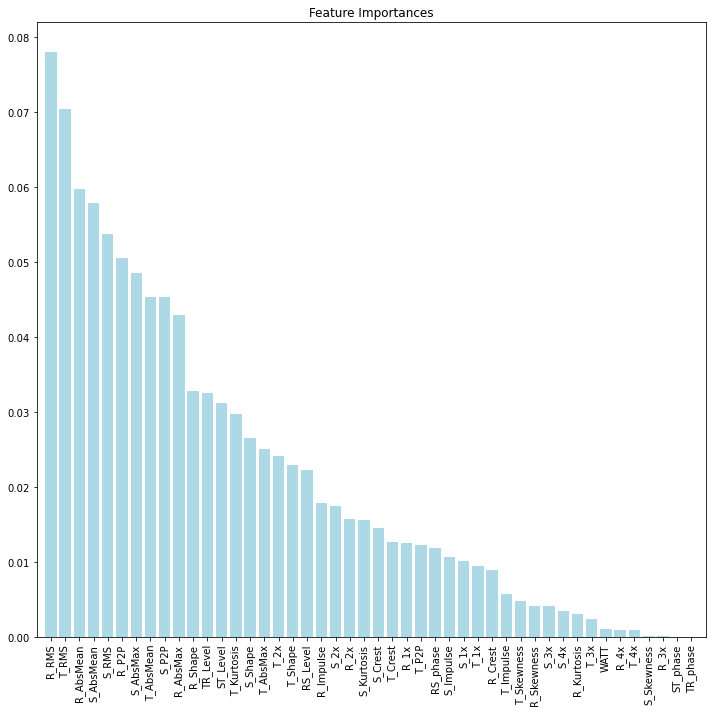

In [20]:
plt.figure(figsize=(10,10))
plt.title("Feature Importances")

plt.bar(range(X_tr.shape[1]), importance[indices], color='lightblue', align='center')
plt.xticks(range(X_tr.shape[1]), col_names[indices], rotation=90)
plt.xlim([-1, X_tr.shape[1]])
plt.tight_layout()

print((importance > 0.05).sum(), importance.sum())
print(len(importance),  1/len(importance), (importance > 1/len(importance)).sum(), importance.sum())

- 중요도의 합은 1이기 때문에 46개의 Feature가 모두 동일한 중요도를 가진다면 0.021 (1/46)의 값을 가질 것입니다.
- 그러나 평균적인 중요도(0.021) 보다 높은 Feature는 19개입니다.


- 중요도가 높은 Feature만을 모아서 SVM에 적용하면 결과가 어떨지 확인해 보는 것도 재미 있을 것 같습니다.

---

## 퀴즈

2.4에서 Random forest 모델을 바탕으로 구한 `importance`를 기반으로 평균적인 중요도(0.021) 보다 높은 Feature 19개를 사용한 svm 모델을 구현해봅시다.

아래 코드에서 평균적인 중요도(0.021) 보다 높은 Feature 19 개로 구성된 데이터프레임을 구하고 `Xs_important`에 저장합니다.

5번째 줄의 `None`에 적절한 코드를 넣어 해결합니다.

In [22]:
# 중요도가 높은 Feature만을 저장
important_col_names = [name for i,name in enumerate(col_names) if importance[i]> 1/len(importance) ]

# importan_col_names에 해당되는 Feature들만 선택한 Xs_importa 데이터프레임 저장
Xs_important = Xs[important_col_names]

# 데이터 분리
X_tr_important, X_te_important, Y_tr_important, Y_te_important = train_test_split(Xs_important.values, Ys.values, test_size=test_size, random_state=seed)

# LinearSVC에 전처리 파이프라인 추가
pipe_important = Pipeline([('scaler', StandardScaler()), ('LinearSVC', svm.LinearSVC(max_iter=10000, class_weight='balanced'))])
model_important = pipe_important.fit(X_tr_important, Y_tr_important.ravel())

#모델의 학습 성능 평가
print(f'Accuracy of svm.SVC classifier on training set: {model_important.score(X_tr_important, Y_tr_important)}')
print(f'Accuracy of svm.SVC classifier on test set: {model_important.score(X_te_important, Y_te_important)}')

y_pred_important = model_important.predict(X_te_important)
print(metrics.classification_report(Y_te_important, y_pred_important, labels=np.unique(y_pred_important)))
print("confusion matrix:\n", metrics.confusion_matrix(Y_te_important, y_pred_important))

Accuracy of svm.SVC classifier on training set: 0.7595072308516336
Accuracy of svm.SVC classifier on test set: 0.7730192719486081
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       212
           1       0.68      0.98      0.80        42
           2       0.84      0.46      0.60        69
           3       0.83      1.00      0.91        72
           4       0.87      0.72      0.79        72

    accuracy                           0.77       467
   macro avg       0.79      0.79      0.77       467
weighted avg       0.78      0.77      0.76       467

confusion matrix:
 [[164  19   6  15   8]
 [  1  41   0   0   0]
 [ 37   0  32   0   0]
 [  0   0   0  72   0]
 [ 20   0   0   0  52]]


## 제출하기

퀴즈 수행 후, 아래 코드를 실행하면 `Xs_important` 변수가 저장된 `submission.pickle` 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [23]:
import pickle

d = {'quiz': Xs_important.values}

with open('submission.pickle', 'wb') as f:
    pickle.dump(d, f)

In [24]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()